# Object Detection

## HOG Feature Descriptor

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def is_inside(inside, outside):
    ix, iy, iw, ih = inside
    ox, oy, ow, oh = outside
    return ix > ox and ix + iw < ox + ow and iy > oy and iy + ih < oy + oh

In [4]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

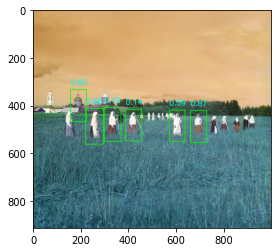

In [8]:
img = cv2.imread('../images/haying.jpg')

# `cv2.HOGDescriptor.detectMultiscale` return a list of bounding rect for detected objects and a list of
# weights or confidence score of the detected objects. Higher value = more confidence
found_rects, found_weights = hog.detectMultiScale(img, winStride=(4,4), scale=1.02, finalThreshold=1.9)

found_rects_filtered = []
found_weights_filtered = []
for ri, r in enumerate(found_rects):
    for qi, q in enumerate(found_rects):
        if (ri != qi and is_inside(r, q)):
            break
        else:
            found_rects_filtered.append(r)
            found_weights_filtered.append(found_weights[ri])

for ri, r in enumerate(found_rects_filtered):
    x, y, w, h = r
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    text = '%.2f' % found_weights_filtered[ri]
    cv2.putText(img, text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

plt.imshow(img)

In [6]:
cv2.rectangle?
cv2.putText?

Docstring:
putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
.   @brief Draws a text string.
.   
.   The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered
.   using the specified font are replaced by question marks. See #getTextSize for a text rendering code
.   example.
.   
.   @param img Image.
.   @param text Text string to be drawn.
.   @param org Bottom-left corner of the text string in the image.
.   @param fontFace Font type, see #HersheyFonts.
.   @param fontScale Font scale factor that is multiplied by the font-specific base size.
.   @param color Text color.
.   @param thickness Thickness of the lines used to draw a text.
.   @param lineType Line type. See #LineTypes
.   @param bottomLeftOrigin When true, the image data origin is at the bottom-left corner. Otherwise,
.   it is at the top-left corner.
Type:      builtin_function_or_method
